In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [24]:
IMAGE_SIZE = 512
BATCH = 32


In [25]:
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(512,512),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 3360 images belonging to 2 classes.


In [26]:
val_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [27]:
val_generator = val_datagen.flow_from_directory(
        'output/val',
        target_size=(512,512),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 420 images belonging to 2 classes.


In [28]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [29]:
test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(512,512),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 420 images belonging to 2 classes.


In [30]:
class_names = ["Normal","Tuberculosis"]

In [31]:
model = models.Sequential();
 #cnn 
    #dense


In [32]:
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [33]:
# model.add(layers.Flatten())
# model.add(layers.Dense(64,activation = "relu"))
# model.add(layers.Dense(2,activation = "softmax"))
input_shape = (512, 512, 3)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu',padding = "same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
(3360/ 32)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1032256)           0         
                                                                 
 dense (Dense)               (None, 64)               

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=105,
    batch_size=32,
    validation_data=val_generator,
    validation_steps=6,
    verbose=1,
    epochs=13,
)


Epoch 1/13
105/105 [==============================] - 353s 3s/step - loss: 1.1422 - accuracy: 0.8863 - val_loss: 0.1319 - val_accuracy: 0.9479
Epoch 2/13
105/105 [==============================] - 341s 3s/step - loss: 0.7294 - accuracy: 0.8750 - val_loss: 0.1717 - val_accuracy: 0.9583
Epoch 3/13
105/105 [==============================] - 353s 3s/step - loss: 0.1413 - accuracy: 0.9500 - val_loss: 0.1551 - val_accuracy: 0.9427
Epoch 4/13
105/105 [==============================] - 381s 4s/step - loss: 0.1312 - accuracy: 0.9551 - val_loss: 0.0957 - val_accuracy: 0.9635
Epoch 5/13
105/105 [==============================] - 376s 4s/step - loss: 0.1525 - accuracy: 0.9443 - val_loss: 0.1570 - val_accuracy: 0.9427
Epoch 6/13
105/105 [==============================] - 350s 3s/step - loss: 0.1212 - accuracy: 0.9577 - val_loss: 0.1108 - val_accuracy: 0.9740
Epoch 7/13
105/105 [==============================] - 367s 3s/step - loss: 0.1075 - accuracy: 0.9613 - val_loss: 0.1236 - val_accuracy: 0.9583

In [37]:
print(tf. __version__)

2.10.0


In [38]:
(420/ 32)

13.125

first image to predict
actual label: Normal
1/1 [==============================] - 1s 540ms/step
predicted label: Normal


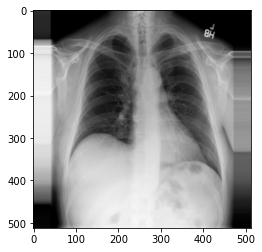

In [49]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break